In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
#Metrics:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import RFE

#Imputer for missing values
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statistics


In [2]:
#load the dataset
df = pd.read_csv("my_dataset.csv", sep=';')
print("The dataset has %d rows and %d columns." % df.shape)
N=400
df.head()

The dataset has 400 rows and 25 columns.


,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#replace categorical value with number
df['RBC'] = df['RBC'].replace({'normal': '1'})
df['RBC'] = df['RBC'].replace({'abnormal': '2'})
df['PC'] = df['PC'].replace({'normal': '1'})
df['PC'] = df['PC'].replace({'abnormal': '2'})
df['PCC'] = df['PCC'].replace({'present': '1'})
df['PCC'] = df['PCC'].replace({'notpresent': '2'})
df['BA'] = df['BA'].replace({'present': '1'})
df['BA'] = df['BA'].replace({'notpresent': '2'})
df['HTN'] = df['HTN'].replace({'yes': '1'})
df['HTN'] = df['HTN'].replace({'no': '2'})
df['DM'] = df['DM'].replace({'yes': '1'})
df['DM'] = df['DM'].replace({'no': '2'})
df['CAD'] = df['CAD'].replace({'yes': '1'})
df['CAD'] = df['CAD'].replace({'no': '2'})
df['APPET'] = df['APPET'].replace({'good': '1'})
df['APPET'] = df['APPET'].replace({'poor': '2'})
df['PE'] = df['PE'].replace({'yes': '1'})
df['PE'] = df['PE'].replace({'no': '2'})
df['ANE'] = df['ANE'].replace({'yes': '1'})
df['ANE'] = df['ANE'].replace({'no': '2'})
df['CLASS'] = df['CLASS'].replace({'ckd': '1'})
df['CLASS'] = df['CLASS'].replace({'notckd': '0'})

df.head(15)

,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,?,1,2,2,121,36,1.2,?,?,15.4,44,7800,5.2,1,1,2,1,2,2,1
1,7,50,1.020,4,0,?,1,2,2,?,18,0.8,?,?,11.3,38,6000,?,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,1,2,2,423,53,1.8,?,?,9.6,31,7500,?,2,1,2,2,2,1,1
3,48,70,1.005,4,0,1,2,1,2,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,1,2,2,106,26,1.4,?,?,11.6,35,7300,4.6,2,2,2,1,2,2,1
5,60,90,1.015,3,0,?,?,2,2,74,25,1.1,142,3.2,12.2,39,7800,4.4,1,1,2,1,1,2,1
6,68,70,1.010,0,0,?,1,2,2,100,54,24.0,104,4.0,12.4,36,?,?,2,2,2,1,2,2,1
7,24,?,1.015,2,4,1,2,2,2,410,31,1.1,?,?,12.4,44,6900,5,2,1,2,1,1,2,1
8,52,100,1.015,3,0,1,2,1,2,138,60,1.9,?,?,10.8,33,9600,4.0,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,2,1,2,70,107,7.2,114,3.7,9.5,29,12100,3.7,1,1,2,2,2,1,1


In [ ]:
df.isnull().sum()

In [4]:
#Replacing '?' with NaN

df['AGE'] = df['AGE'].replace({'?': np.nan})
df['BP'] = df['BP'].replace({'?': np.nan})
df['SG'] = df['SG'].replace({'?': np.nan})
df['AL'] = df['AL'].replace({'?': np.nan})
df['SU'] = df['SU'].replace({'?': np.nan})
df['BGR'] = df['BGR'].replace({'?': np.nan})
df['BU'] = df['BU'].replace({'?': np.nan})
df['SC'] = df['SC'].replace({'?': np.nan})
df['SOD'] = df['SOD'].replace({'?': np.nan})
df['POT'] = df['POT'].replace({'?': np.nan})
df['HEMO'] = df['HEMO'].replace({'?': np.nan})
df['PCV'] = df['PCV'].replace({'?': np.nan})
df['WBCC'] = df['WBCC'].replace({'?': np.nan})
df['RBCC'] = df['RBCC'].replace({'?': np.nan})
df['RBC'] = df['RBC'].replace({'?': np.nan})
df['PC'] = df['PC'].replace({'?': np.nan})
df['PCC'] = df['PCC'].replace({'?': np.nan})
df['BA'] = df['BA'].replace({'?': np.nan})
df['CAD'] = df['CAD'].replace({'?': np.nan})
df['HTN'] = df['HTN'].replace({'?': np.nan})
df['DM'] = df['DM'].replace({'?': np.nan})
df['APPET'] = df['APPET'].replace({'?': np.nan})
df['PE'] = df['PE'].replace({'?': np.nan})
df['ANE'] = df['ANE'].replace({'?': np.nan})

df.head(15)


,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,NaN,1,2,2,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,2,1,2,2,1
1,7,50,1.020,4,0,NaN,1,2,2,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,1,2,2,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,2,1,2,2,2,1,1
3,48,70,1.005,4,0,1,2,1,2,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,1,2,2,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,2,2,2,1,2,2,1
5,60,90,1.015,3,0,NaN,NaN,2,2,74,25,1.1,142,3.2,12.2,39,7800,4.4,1,1,2,1,1,2,1
6,68,70,1.010,0,0,NaN,1,2,2,100,54,24.0,104,4.0,12.4,36,NaN,NaN,2,2,2,1,2,2,1
7,24,NaN,1.015,2,4,1,2,2,2,410,31,1.1,NaN,NaN,12.4,44,6900,5,2,1,2,1,1,2,1
8,52,100,1.015,3,0,1,2,1,2,138,60,1.9,NaN,NaN,10.8,33,9600,4.0,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,2,1,2,70,107,7.2,114,3.7,9.5,29,12100,3.7,1,1,2,2,2,1,1


,AGE,BP,SG,AL,SU,RBC,PC,PCC,BA,BGR,BU,SC,SOD,POT,HEMO,PCV,WBCC,RBCC,HTN,DM,CAD,APPET,PE,ANE,CLASS
1,7,50,1.020,4,0,NaN,1,2,2,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,2,2,2,1,2,2,1
75,5,NaN,1.015,1,0,NaN,1,2,2,NaN,16,0.7,138,3.2,8.1,NaN,NaN,NaN,2,2,2,1,2,1,1
131,5,50,1.010,0,0,NaN,1,2,2,NaN,25,0.6,NaN,NaN,11.8,36,12400,NaN,2,2,2,1,2,2,1
150,8,60,1.025,3,0,1,1,2,2,78,27,0.9,NaN,NaN,12.3,41,6700,NaN,2,2,2,2,1,2,1
185,4,NaN,1.020,1,0,NaN,1,2,2,99,23,0.6,138,4.4,12,34,NaN,NaN,2,2,2,1,2,2,1
186,8,50,1.020,4,0,1,1,2,2,NaN,46,1.0,135,3.8,NaN,NaN,NaN,NaN,2,2,2,1,1,2,1
187,3,NaN,1.010,2,0,1,1,2,2,NaN,22,0.7,NaN,NaN,10.7,34,12300,NaN,2,2,2,1,2,2,1
188,8,NaN,NaN,NaN,NaN,NaN,NaN,2,2,80,66,2.5,142,3.6,12.2,38,NaN,NaN,2,2,2,1,2,2,1
190,6,60,1.010,4,0,2,2,2,1,94,67,1.0,135,4.9,9.9,30,16700,4.8,2,2,2,2,2,2,1
215,2,NaN,1.010,3,0,1,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,1,1,2,1


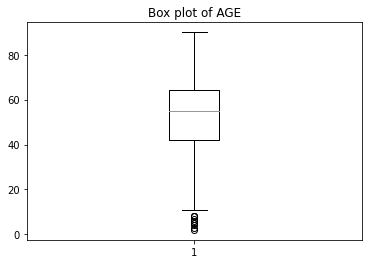

In [5]:
#BoxPlots

BoxPlot = df['AGE'].dropna().astype(float)

plt.boxplot(BoxPlot)
plt.title('Box plot of AGE')

df[df['AGE'].astype(float) < 10]

In [6]:
#searching for missing values and strategy to handle it
def Missing_Values_and_mean(name,data):
  i=0
  media=0
  tot=0
  for x in data:
    if(np.isnan(float(x))):
      i=i+1
    else:
      tot=tot+float(x)
  media=tot/(N-i)
  print("\n%s Analysis" %name)    
  print("Missing values: %d" %i)   
  print("Media: %f " %media)

def Missing_Values_and_mean_categoric(name,data):
    i=0
    k=0
    j=0
    media=0
    tot=0
    for x in data:
      if(np.isnan(float(x))):
        i=i+1
      elif(x=='1'):
        j=j+1
      elif(x=='2'):
        k=k+1    
    print("\n%s Analysis" %name)    
    print("Missing values: %d" %i)   
    print("Num 1: %d " %j)
    print("Num 2: %d" %k)

#searching for missing values and counting AL e SU ( nominal,0 1 2 3 4 5)
def Missing_Values_and_mean_AL_SU(name,data):
  n0=0
  n1=0
  n2=0
  n3=0
  n4=0
  n5=0
  for x in data:
    if(x=='0'):
      n0=n0+1
    elif(x=='1'):
      n1=n1+1
    elif(x=='2'):
      n2=n2+1
    elif(x=='3'):
      n3=n3+1
    elif(x=='4'):
      n4=n4+1
    elif(x=='5'):
      n5=n5+2
          
  print("\n%s Analysis" %name)    
  print("N0: %d"%n0)
  print("N1: %d"%n1)
  print("N2: %d"%n2)
  print("N3: %d"%n3)
  print("N4: %d"%n4)
  print("N5: %d"%n5)


def missing_values_for_each_row():
  k=0
  for ix in df.index:
      for y in df.loc[ix]:
        if(np.isnan(float(y))):
          k=k+1
      if(k>5):
        print(k)
      k=0

def calculateMean(name):
  i=0
  media=0
  tot=0
  for x in df[name]:
    if(np.isnan(float(x))):
      i=i+1
    else:
      tot=tot+float(x)
  media=tot/(N-i) 
  return media

def calculateMostFrequent(name):
    i=0
    k=0
    j=0
    media=0
    tot=0
    for x in df[name]:
      if(np.isnan(float(x))):
        i=i+1
      elif(x=='1'):
        j=j+1
      elif(x=='2'):
        k=k+1  
    if(j>k):
      return j
    else:
      return k 


def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    print(random_sample)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample


  


In [7]:
Missing_Values_and_mean("AGE",df['AGE'])
Missing_Values_and_mean("BP",df['BP'])
Missing_Values_and_mean("SG",df['SG'])
Missing_Values_and_mean_AL_SU("AL",df['AL'])
Missing_Values_and_mean_AL_SU("SU",df['SU'])
Missing_Values_and_mean("BGR",df['BGR'])
Missing_Values_and_mean("BU",df['BU'])
Missing_Values_and_mean("SC",df['SC'])
Missing_Values_and_mean("SOD",df['SOD'])
Missing_Values_and_mean("POT",df['POT'])
Missing_Values_and_mean("HEMO",df['HEMO'])
Missing_Values_and_mean("PCV",df['PCV'])
Missing_Values_and_mean("WBCC",df['WBCC'])
Missing_Values_and_mean("RBCC",df['RBCC'])

Missing_Values_and_mean_categoric("RBC",df['RBC'])
Missing_Values_and_mean_categoric("PC",df['PC'])
Missing_Values_and_mean_categoric("PCC",df['PCC'])
Missing_Values_and_mean_categoric("BA",df['BA'])
Missing_Values_and_mean_categoric("HTN",df['HTN'])
Missing_Values_and_mean_categoric("DM",df['DM'])
Missing_Values_and_mean_categoric("CAD",df['CAD'])
Missing_Values_and_mean_categoric("APPET",df['APPET'])
Missing_Values_and_mean_categoric("PE",df['PE'])
Missing_Values_and_mean_categoric("ANE",df['ANE'])
Missing_Values_and_mean_categoric("CLASS",df['CLASS'])


AGE Analysis
Missing values: 9
Media: 51.483376 

BP Analysis
Missing values: 12
Media: 76.469072 

SG Analysis
Missing values: 47
Media: 1.017408 

AL Analysis
N0: 199
N1: 44
N2: 43
N3: 43
N4: 24
N5: 2

SU Analysis
N0: 290
N1: 13
N2: 18
N3: 14
N4: 13
N5: 6

BGR Analysis
Missing values: 44
Media: 148.036517 

BU Analysis
Missing values: 19
Media: 57.425722 

SC Analysis
Missing values: 17
Media: 3.072454 

SOD Analysis
Missing values: 87
Media: 137.528754 

POT Analysis
Missing values: 88
Media: 4.627244 

HEMO Analysis
Missing values: 52
Media: 12.526437 

PCV Analysis
Missing values: 71
Media: 38.884498 

WBCC Analysis
Missing values: 106
Media: 8406.122449 

RBCC Analysis
Missing values: 131
Media: 4.707435 

RBC Analysis
Missing values: 152
Num 1: 201 
Num 2: 47

PC Analysis
Missing values: 65
Num 1: 259 
Num 2: 76

PCC Analysis
Missing values: 4
Num 1: 42 
Num 2: 354

BA Analysis
Missing values: 4
Num 1: 22 
Num 2: 374

HTN Analysis
Missing values: 2
Num 1: 147 
Num 2: 251

DM An

In [8]:
#Drop the feature with high percentage of missing values
df=df.drop('SOD' , axis=1)
df=df.drop('POT' , axis=1)
df=df.drop('WBCC' , axis=1)
df=df.drop('RBCC' , axis=1)
df=df.drop('RBC' , axis=1)

df.head(10)

,AGE,BP,SG,AL,SU,PC,PCC,BA,BGR,BU,SC,HEMO,PCV,HTN,DM,CAD,APPET,PE,ANE,CLASS
0,48,80,1.020,1,0,1,2,2,121,36,1.2,15.4,44,1,1,2,1,2,2,1
1,7,50,1.020,4,0,1,2,2,NaN,18,0.8,11.3,38,2,2,2,1,2,2,1
2,62,80,1.010,2,3,1,2,2,423,53,1.8,9.6,31,2,1,2,2,2,1,1
3,48,70,1.005,4,0,2,1,2,117,56,3.8,11.2,32,1,2,2,2,1,1,1
4,51,80,1.010,2,0,1,2,2,106,26,1.4,11.6,35,2,2,2,1,2,2,1
5,60,90,1.015,3,0,NaN,2,2,74,25,1.1,12.2,39,1,1,2,1,1,2,1
6,68,70,1.010,0,0,1,2,2,100,54,24.0,12.4,36,2,2,2,1,2,2,1
7,24,NaN,1.015,2,4,2,2,2,410,31,1.1,12.4,44,2,1,2,1,1,2,1
8,52,100,1.015,3,0,2,1,2,138,60,1.9,10.8,33,1,1,2,1,2,1,1
9,53,90,1.020,2,0,2,1,2,70,107,7.2,9.5,29,1,1,2,2,2,1,1


Text(0.5, 1.0, 'Correlation Matrix')

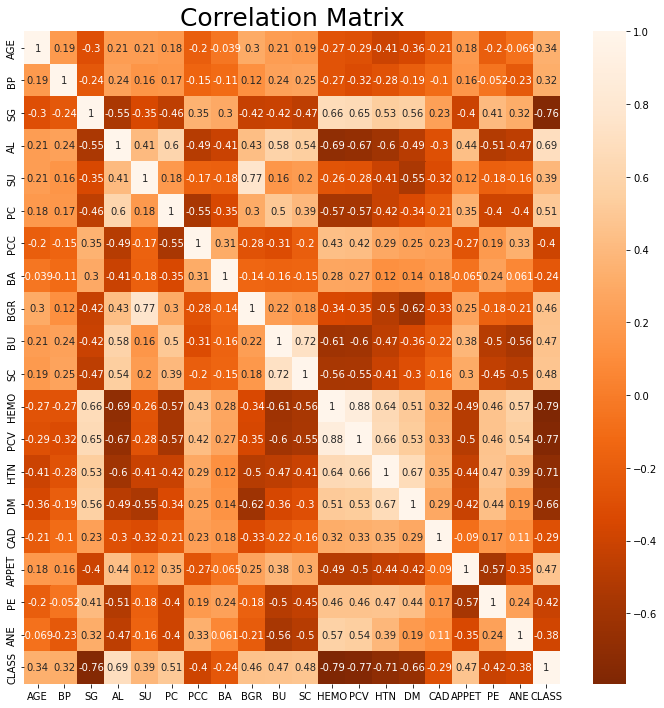

In [9]:
#Correlation matrix 
dff = df.dropna().astype(float)
varcov = dff.corr()

plt.figure(figsize=(12,12))
sns.heatmap(varcov, annot=True, cmap="Oranges_r")
plt.title('Correlation Matrix', fontsize=25)

In [10]:
#From correlation matrix:
#PCV e HEMO are high correlated, drop PCV
#SC e BU are high correlated, drop BU
df=df.drop('PCV' , axis=1)
df=df.drop('BU' , axis=1)

In [12]:
#replacement
#AGE - BP - BU - SC
df['AGE'] = df['AGE'].replace({np.nan: int(calculateMean('AGE'))})
df['BP'] = df['BP'].replace({np.nan: int(calculateMean('BP'))})
#df['BU'] = df['BU'].replace({'?': int(calculateMean('BU'))})
df['SC'] = df['SC'].replace({np.nan: calculateMean('SC')})
#df['BGR'] = df['BGR'].replace({'?': calculateMean('BGR')})
#df['HEMO'] = df['HEMO'].replace({'?': int(calculateMean('HEMO'))})
#df['PCV'] = df['PCV'].replace({'?': int(calculateMean('PCV'))})


df['PCC'] = df['PCC'].replace({np.nan: calculateMostFrequent('PCC')})
df['BA'] = df['BA'].replace({np.nan: calculateMostFrequent('BA')})
df['DM'] = df['DM'].replace({np.nan: calculateMostFrequent('DM')})
df['CAD'] = df['CAD'].replace({np.nan: calculateMostFrequent('CAD')})
df['HDM'] = df['HTN'].replace({np.nan: calculateMostFrequent('CAD')})
df['APPET'] = df['APPET'].replace({np.nan: calculateMostFrequent('APPET')})
df['PE'] = df['PE'].replace({np.nan: calculateMostFrequent('PE')})
df['ANE'] = df['ANE'].replace({np.nan: calculateMostFrequent('ANE')})


df = shuffle(df)
df.head(10)


,AGE,BP,SG,AL,SU,PC,PCC,BA,BGR,SC,HEMO,HTN,DM,CAD,APPET,PE,ANE,CLASS,HDM
208,67,80,NaN,NaN,NaN,NaN,2,2,341,1.5,12.3,1,1,2,1,2,1,1,1
186,8,50,1.020,4,0,1,2,2,NaN,1.0,NaN,2,2,2,1,1,2,1,2
32,61,90,1.010,1,1,1,2,2,159,1.5,11.3,1,1,2,2,2,2,1,1
314,39,70,1.025,0,0,1,2,2,131,0.6,15.6,2,2,2,1,2,2,0,2
12,68,70,1.015,3,1,1,1,2,208,2.1,9.7,1,1,1,2,1,2,1,1
238,72,100,NaN,NaN,NaN,NaN,2,2,201,13.4,9.4,1,1,2,1,2,1,1,1
166,27,60,NaN,NaN,NaN,NaN,2,2,76,3.9,NaN,2,2,2,2,1,1,1,2
154,56,90,1.005,4,3,2,2,2,242,16.4,8.4,1,1,2,2,1,1,1,1
81,45,90,NaN,NaN,NaN,NaN,2,2,360,2.4,8.3,1,1,2,1,2,2,1,1
352,37,60,1.020,0,0,1,2,2,109,1.1,15.0,2,2,2,1,2,2,0,2


In [13]:
Missing_Values_and_mean("AGE",df['AGE'])
Missing_Values_and_mean("BP",df['BP'])
Missing_Values_and_mean("SG",df['SG'])
Missing_Values_and_mean_AL_SU("AL",df['AL'])
Missing_Values_and_mean_AL_SU("SU",df['SU'])
Missing_Values_and_mean("BGR",df['BGR'])
#Missing_Values_and_mean("BU",df['BU'])
Missing_Values_and_mean("SC",df['SC'])
#Missing_Values_and_mean("SOD",df['SOD'])
#Missing_Values_and_mean("POT",df['POT'])
Missing_Values_and_mean("HEMO",df['HEMO'])
#Missing_Values_and_mean("PCV",df['PCV'])
#Missing_Values_and_mean("WBCC",df['WBCC'])
#Missing_Values_and_mean("RBCC",df['RBCC'])

#Missing_Values_and_mean_categoric("RBC",df['RBC'])
Missing_Values_and_mean_categoric("PC",df['PC'])
Missing_Values_and_mean_categoric("PCC",df['PCC'])
Missing_Values_and_mean_categoric("BA",df['BA'])
Missing_Values_and_mean_categoric("HTN",df['HTN'])
Missing_Values_and_mean_categoric("DM",df['DM'])
Missing_Values_and_mean_categoric("CAD",df['CAD'])
Missing_Values_and_mean_categoric("APPET",df['APPET'])
Missing_Values_and_mean_categoric("PE",df['PE'])
Missing_Values_and_mean_categoric("ANE",df['ANE'])
Missing_Values_and_mean_categoric("CLASS",df['CLASS'])


AGE Analysis
Missing values: 0
Media: 51.472500 

BP Analysis
Missing values: 0
Media: 76.455000 

SG Analysis
Missing values: 47
Media: 1.017408 

AL Analysis
N0: 199
N1: 44
N2: 43
N3: 43
N4: 24
N5: 2

SU Analysis
N0: 290
N1: 13
N2: 18
N3: 14
N4: 13
N5: 6

BGR Analysis
Missing values: 44
Media: 148.036517 

SC Analysis
Missing values: 0
Media: 3.072454 

HEMO Analysis
Missing values: 52
Media: 12.526437 

PC Analysis
Missing values: 65
Num 1: 259 
Num 2: 76

PCC Analysis
Missing values: 0
Num 1: 42 
Num 2: 354

BA Analysis
Missing values: 0
Num 1: 22 
Num 2: 374

HTN Analysis
Missing values: 2
Num 1: 147 
Num 2: 251

DM Analysis
Missing values: 0
Num 1: 137 
Num 2: 261

CAD Analysis
Missing values: 0
Num 1: 34 
Num 2: 364

APPET Analysis
Missing values: 0
Num 1: 317 
Num 2: 82

PE Analysis
Missing values: 0
Num 1: 76 
Num 2: 323

ANE Analysis
Missing values: 0
Num 1: 60 
Num 2: 339

CLASS Analysis
Missing values: 0
Num 1: 250 
Num 2: 0


In [ ]:
#Substitution of missing values with random sampling imputation
random_value_imputation("SG")
random_value_imputation("AL")
random_value_imputation("SU")
random_value_imputation("BGR")
random_value_imputation("HEMO")
random_value_imputation("HTN")
random_value_imputation("PC")

df_y = df['CLASS'].astype(float)
df_x = df.drop(['CLASS'], axis=1).astype(float)

In [ ]:
#Substitution of missing values with KNNImputer

feature_classes = df.iloc[:, 0:24]
print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
knn_missing_values_imputer = KNNImputer(n_neighbors=5)
feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),columns = feature_classes.columns)
print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))

feature_classes.head(40)
feature_classes = shuffle(feature_classes)

df_y = feature_classes['CLASS'].astype(float)
df_x = feature_classes.drop(['CLASS'], axis=1).astype(float)


In [ ]:
#Encoding target class using label encoding
target_class = df_y

target_label_encoder = preprocessing.LabelEncoder()
target_class = target_label_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['CLASS'])
#split the dataset into training and testing data
df_x_training, df_x_test, df_y_training, df_y_test = train_test_split(df_x, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
print(df_x_training)
print(df_x_test)
print(df_y_training)
print(df_y_test)


In [ ]:
my_logi = LogisticRegression().fit(df_x_training, df_y_training)
my_logi_predict_test = my_logi.predict(df_x_test)

my_logi = LogisticRegression()

parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#apply gridsearch to find the optimal solution
logi_grid_search = GridSearchCV(my_logi, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
logi_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(logi_grid_search.best_params_))

#svm predictions on test features
logi_prediction = logi_grid_search.predict(df_x_test)
my_logi.fit(df_x_training,df_y_training)
my_logi_predict_test = my_logi.predict(df_x_test)


logi_acc = accuracy_score(my_logi_predict_test, df_y_test)
logi_preci = precision_score(my_logi_predict_test, df_y_test)
logi_recall = recall_score(my_logi_predict_test, df_y_test)
logi_f1 = f1_score(my_logi_predict_test, df_y_test)

print(logi_acc)
print(logi_preci)
print(logi_recall)
print(logi_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_logi_predict_test,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("LR - KNNImputer model")
plt.show()



In [ ]:
my_neigh = KNeighborsClassifier(n_neighbors=2).fit(df_x_training,df_y_training)

parameters_grid ={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

#apply gridsearch to find the optimal solution
knn_grid_search = GridSearchCV(my_neigh, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knn_grid_search.best_params_))

knn_prediction = knn_grid_search.predict(df_x_test)
my_neigh_predict = my_neigh.predict(df_x_test)

#metrics:
neigh_acc = accuracy_score(my_neigh_predict, df_y_test)
neigh_preci = precision_score(my_neigh_predict, df_y_test)
neigh_recall = recall_score(my_neigh_predict, df_y_test)
neigh_f1 = f1_score(my_neigh_predict, df_y_test)
print(neigh_acc)
print(neigh_preci)
print(neigh_recall)
print(neigh_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_neigh_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("KNN- kNNImputer model")

plt.show()


In [ ]:
my_svm = svm.SVC()

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000]}

svm_grid_search = GridSearchCV(my_svm, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))


#svm predictions on test features
svm_prediction = svm_grid_search.predict(df_x_test)
my_svm.fit(df_x_training,df_y_training)
my_svm_predict = my_svm.predict(df_x_test)

#metrics:
svm_acc = accuracy_score(my_svm_predict, df_y_test)
svm_preci = precision_score(my_svm_predict, df_y_test)
svm_recall = recall_score(my_svm_predict, df_y_test)
svm_f1 = f1_score(my_svm_predict, df_y_test)

print(svm_acc)
print(svm_preci)
print(svm_recall)
print(svm_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_svm_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("SVM - Random sampling model")
plt.show()


In [ ]:
my_svm = svm.LinearSVC()
my_svm.fit(df_x_training,df_y_training)
my_svm_predict = my_svm.predict(df_x_test)

#metrics:
svm_acc = accuracy_score(my_svm_predict, df_y_test)
svm_preci = precision_score(my_svm_predict, df_y_test)
svm_recall = recall_score(my_svm_predict, df_y_test)
svm_f1 = f1_score(my_svm_predict, df_y_test)

print(svm_acc)
print(svm_preci)
print(svm_recall)
print(svm_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_svm_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
my_tree = tree.DecisionTreeClassifier(criterion='entropy')

parameters_grid = {'max_depth': [1,2,3,4,5,6,7] ,
                   'min_samples_split': [2, 3, 4]}

#apply gridsearch to find the optimal solution
tree_grid_search = GridSearchCV(my_tree, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
tree_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(tree_grid_search.best_params_))

tree_prediction = tree_grid_search.predict(df_x_test)

my_tree.fit(df_x_training,df_y_training)
my_tree_predict = my_tree.predict(df_x_test)

#metrics:
tree_acc = accuracy_score(my_tree_predict, df_y_test)
tree_preci = precision_score(my_tree_predict, df_y_test)
tree_recall = recall_score(my_tree_predict, df_y_test)
tree_f1 = f1_score(my_tree_predict, df_y_test)

print(tree_acc)
print(tree_preci)
print(tree_recall)
print(tree_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_tree_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("DT(Entropy) - KNNImputer")
plt.show()


In [ ]:
my_tree = tree.DecisionTreeClassifier(criterion='gini')

parameters_grid = {'max_depth': [1,2,3,4,5,6,7] ,
                   'min_samples_split': [2, 3, 4]}

#apply gridsearch to find the optimal solution
tree_grid_search = GridSearchCV(my_tree, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
tree_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(tree_grid_search.best_params_))

#svm predictions on test features
tree_prediction = tree_grid_search.predict(df_x_test)
my_tree.fit(df_x_training,df_y_training)
my_tree_predict = my_tree.predict(df_x_test)

#metrics:
tree_acc = accuracy_score(my_tree_predict, df_y_test)
tree_preci = precision_score(my_tree_predict, df_y_test)
tree_recall = recall_score(my_tree_predict, df_y_test)
tree_f1 = f1_score(my_tree_predict, df_y_test)

print(tree_acc)
print(tree_preci)
print(tree_recall)
print(tree_f1)


print("Confusion matrix:\n")
cm=confusion_matrix(my_tree_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("DT(Gini) - KNNImmputer")
plt.show()


In [ ]:
my_forest = RandomForestClassifier(criterion='gini')

parameters_grid = {'n_estimators': [1,2,3,4,5,6,7,8],
                   'max_features': [1,2,3,4,5,10],
                   'max_depth' : [1,2,3,4,5,6,7,10],}

#apply gridsearch to find the optimal solution
forest_grid_search = GridSearchCV(my_forest, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
forest_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(forest_grid_search.best_params_))


#svm predictions on test features
forest_prediction = forest_grid_search.predict(df_x_test)
my_forest.fit(df_x_training,df_y_training)
my_forest_predict = my_forest.predict(df_x_test)

#metrics:
forest_acc = accuracy_score(my_forest_predict, df_y_test)
forest_preci = precision_score(my_forest_predict, df_y_test)
forest_recall = recall_score(my_forest_predict, df_y_test)
forest_f1 = f1_score(my_forest_predict, df_y_test)

print(forest_acc)
print(forest_preci)
print(forest_recall)
print(forest_f1)


print("Confusion matrix:\n")
cm=confusion_matrix(my_forest_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("RF(Gini) - KNNImputer")
plt.show()




In [ ]:
my_forest = RandomForestClassifier(criterion='entropy')

parameters_grid = {'n_estimators': [1,2,3,4,5,6,7,8],
                   'max_features': [1,2,3,4,5,10],
                   'max_depth' : [1,2,3,4,5,6,7,10],}

#apply gridsearch to find the optimal solution
forest_grid_search = GridSearchCV(my_forest, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
forest_grid_search.fit(df_x_training, df_y_training)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(forest_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(forest_grid_search.best_estimator_))

#svm predictions on test features
forest_prediction = forest_grid_search.predict(df_x_test)
my_forest.fit(df_x_training,df_y_training)
my_forest_predict = my_forest.predict(df_x_test)

#metrics:
forest_acc = accuracy_score(my_forest_predict, df_y_test)
forest_preci = precision_score(my_forest_predict, df_y_test)
forest_recall = recall_score(my_forest_predict, df_y_test)
forest_f1 = f1_score(my_forest_predict, df_y_test)

print(forest_acc)
print(forest_preci)
print(forest_recall)
print(forest_f1)

print("Confusion matrix:\n")
cm=confusion_matrix(my_forest_predict,df_y_test)

plt.rcParams['figure.dpi'] = 100
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Oranges_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("RF(Entropy) - KNNImputer")
plt.show()
